[View in Colaboratory](https://colab.research.google.com/github/upadhyayprakash/EIP/blob/master/4A_3_Try_99_24_41_252.ipynb)

**Assigment 4A of EIP Batch 3 - Prakash Upadhyay**</br>
**Task: ** Beat the Validation Score of **98.29%** accuracy by using lesser parameters than **68,260**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


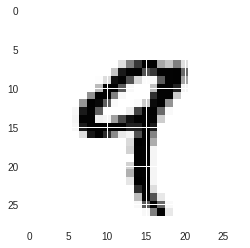

In [179]:
#print (y_train)
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [182]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [184]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [185]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(26,26,1)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(12,12,1)))

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(10,10,1)))


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(8,8,1)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(26, 26, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(12, 12, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(10, 10, 1...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-

In [186]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 6, 6, 32)          9248      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [188]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.1856 - acc: 0.9410
Epoch 2/10
33984/60000 [===============>..............] - ETA: 12s - loss: 0.0644 - acc: 0.9802

60000/60000 [==============================] - 29s 481us/step - loss: 0.0604 - acc: 0.9817
Epoch 3/10
53440/60000 [=========================>....] - ETA: 3s - loss: 0.0453 - acc: 0.9861

60000/60000 [==============================] - 30s 492us/step - loss: 0.0448 - acc: 0.9863
Epoch 4/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.0382 - acc: 0.9876
Epoch 5/10
 1952/60000 [..............................] - ETA: 27s - loss: 0.0404 - acc: 0.9892

60000/60000 [==============================] - 29s 482us/step - loss: 0.0323 - acc: 0.9900
Epoch 6/10
39808/60000 [==================>...........] - ETA: 9s - loss: 0.0289 - acc: 0.9909

60000/60000 [==============================] - 29s 488us/step - loss: 0.0286 - acc: 0.9908
Epoch 7/10
56768/60000 [===========================>..] - ETA: 1s - loss: 0.0248 - acc: 0.9918

60000/60000 [==============================] - 29s 491us/step - loss: 0.0252 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 29s 486us/step - loss: 0.0231 - acc: 0.9923
Epoch 9/10
 3008/60000 [>.............................] - ETA: 28s - loss: 0.0302 - acc: 0.9914

60000/60000 [==============================] - 29s 485us/step - loss: 0.0195 - acc: 0.9934
Epoch 10/10
39968/60000 [==================>...........] - ETA: 9s - loss: 0.0173 - acc: 0.9945

60000/60000 [==============================] - 29s 487us/step - loss: 0.0176 - acc: 0.9945


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [191]:
print(score)

[0.026271994368714514, 0.9924]


**NOTE: ** Above score is the Best of my Three attempts with 99.24% Accuracy and using only 41,252 parameters. I've used Max Pooling and one initial Dropout.